# Capstone Project VII - Unsupervised Machine Learning

## Introduction

In this project, we will be analyzing a dataset on US arrests using unsupervised learning methods such as Principal Component Analysis (PCA) and clustering techniques. The dataset analyzed contains information about the number of arrests per 100,000 residents for crimes including assault, murder, and rape in each of the 50 US states in 1973. By exploring this dataset, we will gain insights into the patterns and trends of criminal activity across the US and identify any underlying relationships or clusters that may exist between different states and types of crimes.

In [1]:
# Import Relevant Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load dataset into pandas
arrests_df = pd.read_csv("UsArrests.csv")

# Display first 5 rows of data
arrests_df.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


## Exploring the Data

In [2]:
# Get the descriptive statistics for the DataFrame
arrests_df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


From the above descriptitve statistics, we can see that the count of all variables is the same, which suggests that there are no missing values in the dataset.

The mean number of arrests per 100,000 residents for murder is 7.788, for assault is 170.76, for urban population is 65.54, and for rape is 21.232. These values provide a rough estimate of the average level of crime across the 50 US states in 1973. It seems that assault is much more common per 100,000 residents across the 50 states than that of murder.

The standard deviation for murder, assault, urban population, and rape are 4.35551, 83.337661, 14.474763, and 9.366385, respectively. This indicates that there is considerable variation in the level of crime across the states, and that the spread of values is greater for assault than for the other variables.

Looking at the interquartile range of each variable we can see that the maximum value for murder of 17.4 is above the 75th percentile of 11.25, so there could be potential outliers in this variable. similarly, the maximum value of 337 for assault is well above the 75th percentile of 249, so there are likely to be outliers in this variable. The same is likely to be true for rape aswel.

## Correlation Analysis

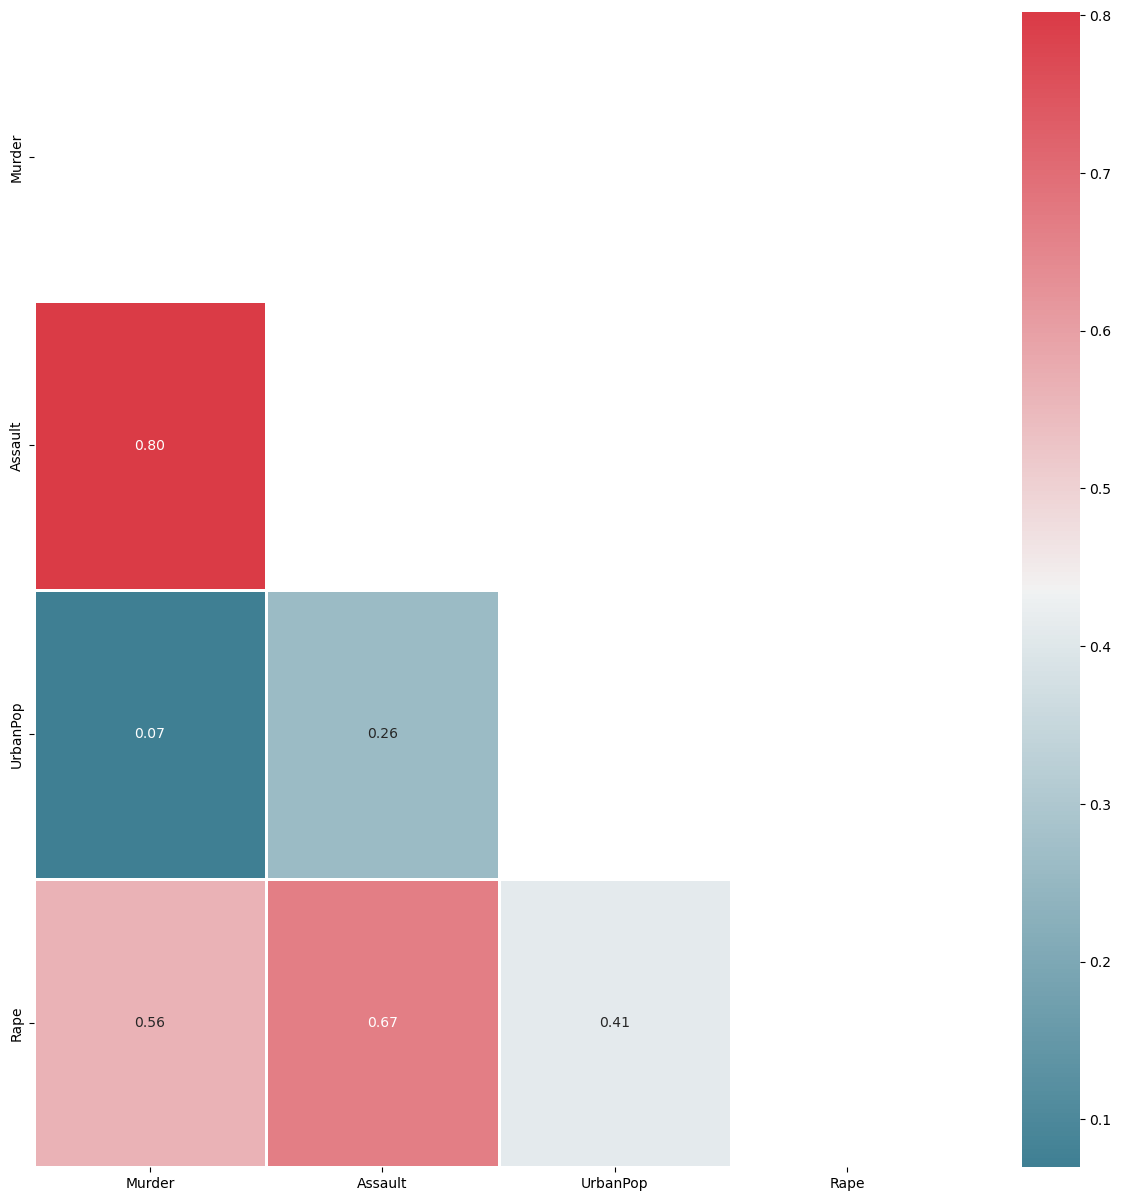

In [3]:
colormap = sns.diverging_palette(220, 10, as_cmap=True)

def corr_heatmap(df):
  # get correlations
  corrs = df.corr()

  # pick appropriate palette for heatmap
  colormap = sns.diverging_palette(220, 10, as_cmap=True)

  # Plot figsize
  fig, ax = plt.subplots(figsize=(15, 15))

  # to mask mirrored side of heatmap
  dropSelf = np.zeros_like(corrs)
  dropSelf[np.triu_indices_from(dropSelf)] = True

  # Generate Heat Map, with annotations of the correlation strength and 2-decimal floats
  ax = sns.heatmap(corrs, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf, linewidth=2)
  
  plt.show()

corr_heatmap(arrests_df)

In [4]:
# Generate correlation matrix
arrests_df.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


In [5]:
# Extract the features
features = ['Murder', 'Assault', 'UrbanPop', 'Rape']
X = arrests_df[features]

# Perform PCA with 2 components
pca = PCA(n_components=2)
pca.fit(X)

# Transform the data to the new coordinate system
transformed_data = pca.transform(X)

# Create a new DataFrame with the transformed data
transformed_df = pd.DataFrame(transformed_data, columns=['PC1', 'PC2'])

# Add the State column to the transformed DataFrame
transformed_df['City'] = arrests_df['City']

# Print the explained variance ratios of the principal components
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")

Explained Variance Ratio: [0.96553422 0.02781734]


The explained variance ratio represents the proportion of the total variance in the data that is explained by each principal component. In this case, the first principal component explains 96.55% of the total variance in the data, while the second principal component explains only 2.78% of the variance.

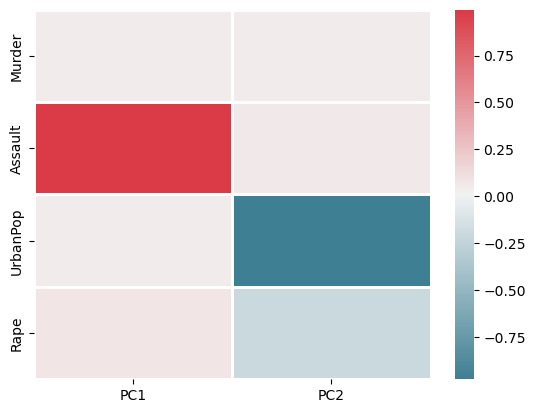

In [6]:
components = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2' ], index=features)
ax = sns.heatmap(components, cmap=colormap, linewidth=1)
plt.show()

For PC1, all the the features are neutral apart from assault feature which has a strong correlation with PC1, which suggests that Assault is the most important variable in driving the variability in the data that is captured by PC1. This is further supported by the high loading value of assault for PC1 that we observed earlier.

The positive correlation between Assault and PC1 could also indicate that as the value of Assault increases, the value of PC1 also increases. This implies that states with high levels of assault tend to have similar profiles in terms of the other variables in the dataset that are captured by PC1.

#### Scatter Plot of First Two Principle Components 

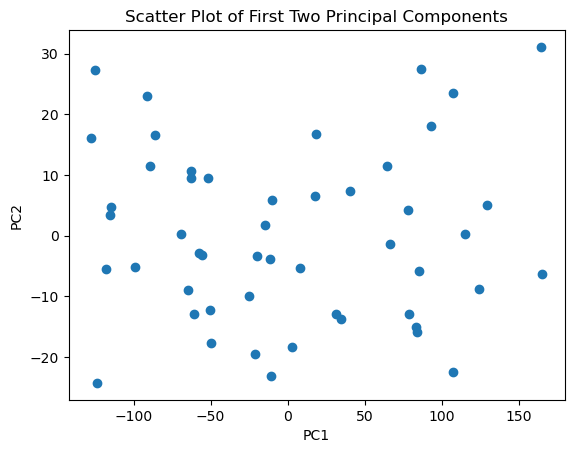

In [7]:
# fit PCA with 2 components
pca_2 = PCA(n_components=2)
pca_2.fit(X)

# transform data to 2D
X_2d = pca_2.transform(X)

# create scatter plot
plt.scatter(X_2d[:, 0], X_2d[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot of First Two Principal Components')
plt.show()

##### Scatter Plot of First Two Principle Components with Standardised Data

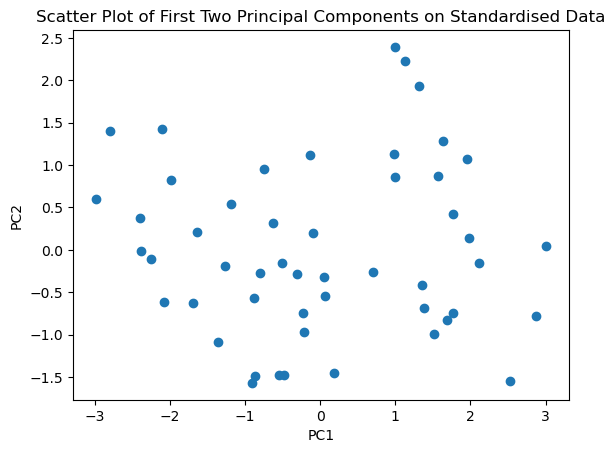

In [8]:
# standardize the data
scaler = StandardScaler()
arrests_std = scaler.fit_transform(arrests_df[features])

# perform PCA with two components
pca_2 = PCA(n_components=2)
arrests_pca_2 = pca.fit_transform(arrests_std)

# create scatter plot of first two principal components
plt.scatter(arrests_pca_2[:, 0], arrests_pca_2[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot of First Two Principal Components on Standardised Data')
plt.show()

#### Scree Plot

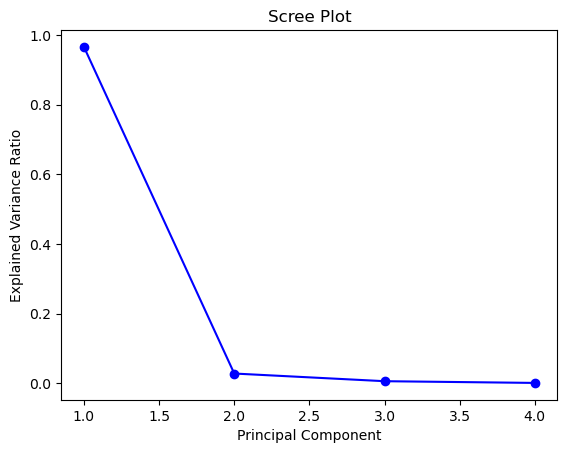

In [9]:
# Fit PCA to the data
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(arrests_df[features])

# Plot the scree plot
plt.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

Based on PCA analysis of the dataset, we have found that the first principal component explains the majority of the variance in the data, with PC1 explaining 96.55% of the variance and PC2 explaining 2.78% of the variance. The explained variance ratio also seems to decrease sharpy after adding more principle components . This suggests that the data can be effectively summarized using one component.

When we plot the data points along the first two principal components, we find a scattered distribution that does not seem to show any clear patterns or clusters. This indicates that there may not be strong correlations or relationships between the variables in the dataset.

This observation, along with the fact that the dataset is small and contains only four variables, suggests that we may need to explore other methods or techniques to gain further insights and understand any underlying patterns or relationships in the data.

## Cluster Analysis

C:\Users\mbask\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


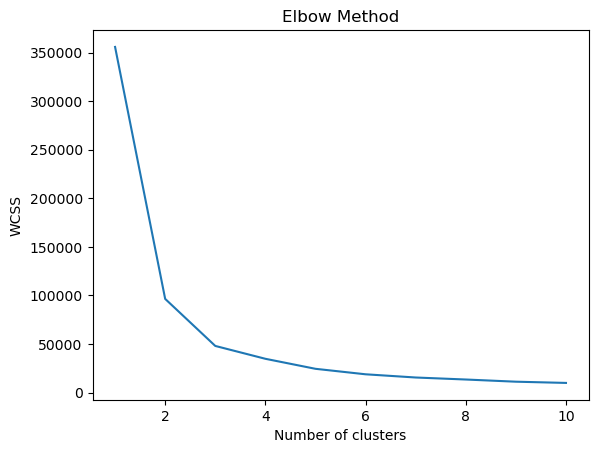

In [10]:
# Select columns to use for clustering
X = arrests_df[['Murder', 'Assault', 'UrbanPop', 'Rape']]

# Create an array to store the WCSS values for different numbers of clusters
wcss = []

# Fit the k-means model with different numbers of clusters and calculate the WCSS for each
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the number of clusters against the WCSS values
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The above elbow method is used to determine an optimal value for n_clusters. We can see that the elbow point is around 3, so 3 clusters will be used.

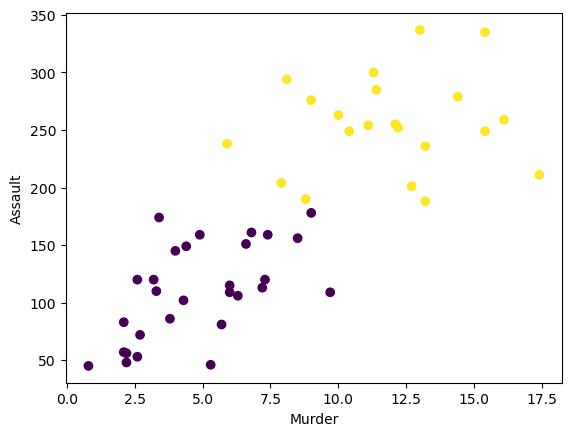

In [11]:
# Assign features
X = arrests_df[['Murder', 'Assault']]

# Instantiate the KMeans model with k=2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster assignments for each data point
labels = kmeans.labels_

# Plot the clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels)
plt.xlabel("Murder")
plt.ylabel("Assault")
plt.show()

In [12]:
# Calculate the silhouette score for the clustering
score = silhouette_score(X, labels)
 
print(f"Silhouette score is: {score:.2f}")

Silhouette score is: 0.63


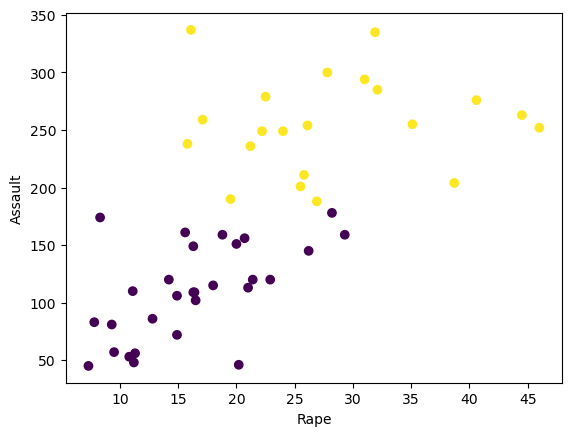

In [13]:
# Assign features
X = arrests_df[['Rape', 'Assault']]

# Instantiate the KMeans model with k=2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster assignments for each data point
labels = kmeans.labels_

# Plot the clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels)
plt.xlabel("Rape")
plt.ylabel("Assault")
plt.show()

In [14]:
# Calculate the silhouette score for the clustering
score = silhouette_score(X, labels)

print(f"Silhouette score is: {score:.2f}")

Silhouette score is: 0.62


A silhouette score of 0.62 or 0.63 for each of the two feature clusters suggests that they are reasonably well separated and distinct from each other, and the data points within each cluster are similar to each other.

After performing K-means clustering on the features of murder and assault, two distinct clusters can be observed. The silhouette score for these clusters is 0.62, which suggests a reasonable level of separation between the two groups. Similarly, for the features of rape and assault, another set of two clusters has been estimated. The silhouette score for these clusters was is 0.63, which again indicates a decent level of separation between the two groups. These results suggest that the two sets of features may be useful in distinguishing between different types of crime.

We could interpret these clusters for each plot as representing two distinct groups of states that have different levels of crime rates for these two features. For example, one cluster could represent states with low murder and assault rates, while the other cluster could represent states with high murder and assault rates.However, further analysis and exploration may be necessary to fully understand the relationships between the features and the underlying patterns of crime